In [2]:
# Install OpenJDK 17
!sudo apt update
!sudo apt install openjdk-17-jdk -y

Place your finger on the fingerprint reader
sudo: apt: command not found
Place your finger on the fingerprint reader
Failed to match fingerprint
Place your finger on the fingerprint reader
Failed to match fingerprint
Place your finger on the fingerprint reader
Place your finger on the reader again
sudo: apt: command not found


In [3]:
pip install language-tool-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import language_tool_python

tool = language_tool_python.LanguageTool('en-US')

def count_grammar_errors(text):
    matches = tool.check(text)
    return len(matches), matches

text = "He go to school every day. It are raining."
count, issues = count_grammar_errors(text)
print(f"Grammar error count: {count}")
for issue in issues:
    print(f" - {issue.ruleId}: {issue.message} at '{issue.context}'")


Grammar error count: 2
 - HE_VERB_AGR: The pronoun ‘He’ is usually used with a third-person or a past tense verb. at 'He go to school every day. It are raining.'
 - IT_VBZ: After ‘It’, use the third-person verb form “is”. at 'He go to school every day. It are raining.'


In [5]:
import json

def load_jsonl(filepath):
    """
    Load a JSONL file and extract text and label fields.
    """
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            entry = json.loads(line.strip())
            data.append({'text': entry['text'], 'label': entry['label']})
    return data

filename = 'subtaskA_dev_monolingual.jsonl'
entries = load_jsonl(filename)

# Extract texts and labels
texts = [entry['text'] for entry in entries]
labels = [entry['label'] for entry in entries]

print(f"Loaded {len(texts)} entries from {filename}.")

Loaded 5000 entries from subtaskA_dev_monolingual.jsonl.


In [6]:
import language_tool_python

# Initialize LanguageTool
tool = language_tool_python.LanguageTool('en-US')

def analyze_grammar(text):
    """
    Analyze grammar issues using LanguageTool.
    """
    matches = tool.check(text)
    error_count = len(matches)
    error_types = [match.ruleId for match in matches]
    return error_count, error_types

In [7]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd

def analyze_all_texts_with_labels(text_list, label_list):
    """
    Analyze grammar errors for a list of texts with labels.
    """
    results = []

    for i, (text, label) in enumerate(zip(text_list, label_list)):
        error_count, error_types = analyze_grammar(text)
        results.append({
            'id': i,
            'text': text,
            'label': label,
            'error_count': error_count,
            'error_types': error_types,
            'word_count': len(text.split())
        })

        if (i + 1) % 10 == 0:
            print(f"Analyzed {i + 1} texts...")

    return pd.DataFrame(results)

df_grammar = analyze_all_texts_with_labels(texts, labels)

In [10]:
df_grammar = pd.read_csv("grammar_analysis_labeled.csv")

# Split by label
df_human = df_grammar[df_grammar['label'] == 0]
df_machine = df_grammar[df_grammar['label'] == 1]

# Summary statistics
print("Human-written text statistics:")
print(df_human['error_count'].describe())

print("\nMachine-generated text statistics:")
print(df_machine['error_count'].describe())

# Save to CSV
df_grammar.to_csv("grammar_analysis_labeled.csv", index=False)

Human-written text statistics:
count    2500.000000
mean       17.688400
std        37.745585
min         0.000000
25%         4.000000
50%         8.000000
75%        19.000000
max       853.000000
Name: error_count, dtype: float64

Machine-generated text statistics:
count    2500.000000
mean        7.528000
std        13.951196
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max       370.000000
Name: error_count, dtype: float64


In [14]:
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


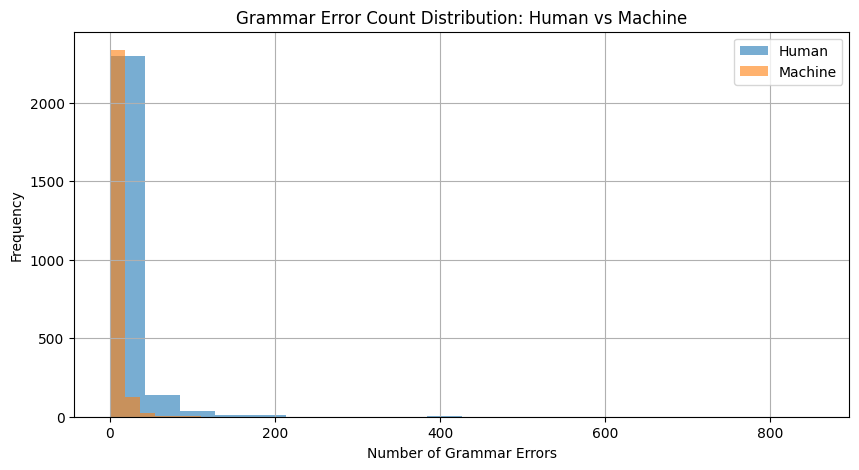

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_human['error_count'], bins=20, alpha=0.6, label='Human')
plt.hist(df_machine['error_count'], bins=20, alpha=0.6, label='Machine')
plt.xlabel("Number of Grammar Errors")
plt.ylabel("Frequency")
plt.title("Grammar Error Count Distribution: Human vs Machine")
plt.legend()
plt.grid(True)
plt.show()


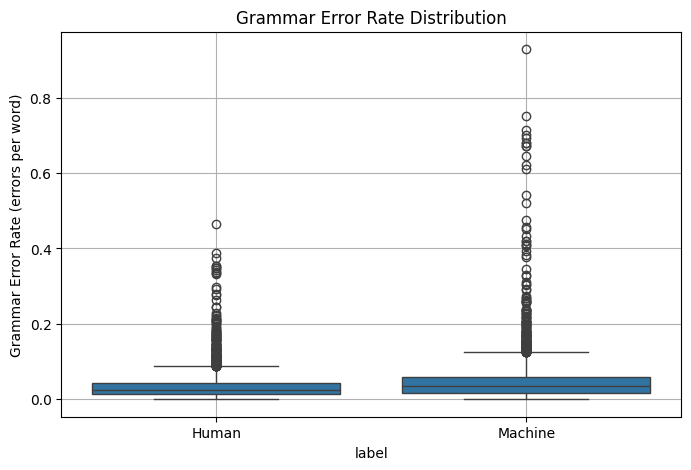

In [15]:
import seaborn as sns
import pandas as pd

df_grammar['error_rate'] = df_grammar['error_count'] / df_grammar['word_count']

plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='error_rate', data=df_grammar)
plt.xticks([0, 1], ['Human', 'Machine'])
plt.ylabel("Grammar Error Rate (errors per word)")
plt.title("Grammar Error Rate Distribution")
plt.grid(True)
plt.show()


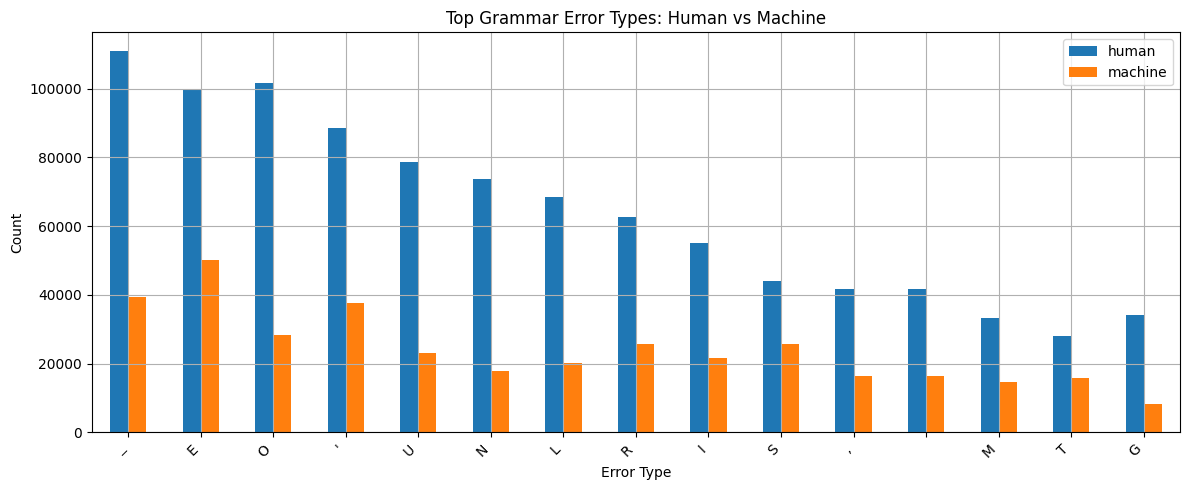

In [16]:
from collections import Counter

# Expand all error types
human_errors = [etype for lst in df_human['error_types'] for etype in lst]
machine_errors = [etype for lst in df_machine['error_types'] for etype in lst]

human_counts = Counter(human_errors)
machine_counts = Counter(machine_errors)

# Convert to DataFrame
df_errors = pd.DataFrame([
    {'error_type': etype, 'human': human_counts.get(etype, 0), 'machine': machine_counts.get(etype, 0)}
    for etype in set(human_counts) | set(machine_counts)
])
df_errors['total'] = df_errors['human'] + df_errors['machine']
df_errors = df_errors.sort_values('total', ascending=False).head(15)

# Plot
df_errors.set_index('error_type')[['human', 'machine']].plot(kind='bar', figsize=(12, 5))
plt.title("Top Grammar Error Types: Human vs Machine")
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
